# Factors Influencing Salaries of Data Science Roles

[Example](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries/code?datasetId=2268489&sortBy=voteCount)

## Table of Contents

- [Factors Influencing Salaries of Data Science Roles](#factors-influencing-salaries-of-data-science-roles)
  - [Table of Contents](#table-of-contents)
  - [Data Exploration](#data-exploration)
    - [Dataset Overview](#dataset-overview)
      - [Work Year](#work-year)
      - [Experience Level](#experience-level)
      - [Employment Type](#employment-type)
      - [Job Title](#job-title)
      - [Countries](#countries)
    - [Key Insights](#key-insights)
      - [Salary Distribution](#salary-distribution)
      - [Salary by Experience Level](#salary-by-experience-level)
      - [Salary by Job Titles](#salary-by-job-titles)
      - [Salary by Employees Region and Company Location](#salary-by-employees-region-and-company-location)
      - [Salary by Company Location and Company Size](#salary-by-company-location-and-company-size)
      - [Salary by Remote Ratio](#salary-by-remote-ratio)
      - [Remote Ratio by Experience Level](#remote-ratio-by-experience-level)
  - [Data Preparation and Model Training](#data-preparation-and-model-training)
    - [Feature Selection](#feature-selection)
    - [Handling Data Issues](#handling-data-issues)
      - [Employment Type Issues](#employment-type-issues)
      - [Job Titles Issues](#job-titles-issues)
    - [Model Training and Performance](#model-training-and-performance)
      - [Supervised Learning](#supervised-learning)
        - [Features Importance](#features-importance)
      - [Unsupervised Learning](#unsupervised-learning)


## Data Exploration

### Dataset Overview

The dataset contains **1500 rows** and **11 columns**.

In [1527]:
import pandas as pd

salaries_data_frame = pd.read_csv("data/jobs_salaries_2023.csv")
print(salaries_data_frame.shape)

column_types = salaries_data_frame.dtypes
print(column_types)

(1500, 11)
work_year               int64
experience_level       object
employment_type        object
job_title              object
salary                float64
salary_currency        object
salary_in_usd         float64
employee_residence     object
remote_ratio            int64
company_location       object
company_size           object
dtype: object


#### Work Year

Most of the job records come from recent years:  
- **2022** has the largest share with ~48% of entries.  
- **2023** follows with ~33%.  
- Earlier years (**2020–2021**) make up a much smaller portion (~20% combined).  

This shows the dataset is heavily skewed toward more recent data.

           count  percentage
work_year                   
2020          75         5.0
2021         219        14.6
2022         714        47.6
2023         492        32.8


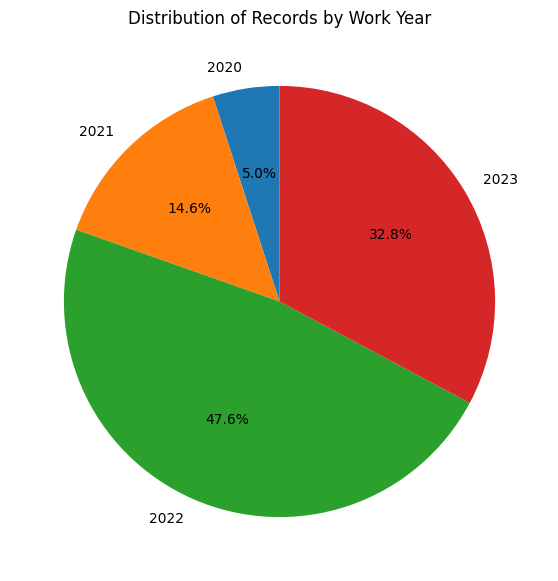

In [1528]:
import matplotlib.pyplot as plt

# Count occurrences of each work_year and sort by year
work_year_counts = salaries_data_frame["work_year"].value_counts().sort_index()

# Calculate percentages
work_year_percent = (work_year_counts / work_year_counts.sum() * 100).round(2)

# Combine into one DataFrame for display
result = pd.DataFrame({"count": work_year_counts, "percentage": work_year_percent})
print(result)

# --- Pie Chart ---
plt.figure(figsize=(7, 7))
plt.pie(
    work_year_counts, 
    labels=work_year_counts.index, 
    autopct="%1.1f%%", 
    startangle=90
)
plt.title("Distribution of Records by Work Year")
plt.show()


#### Experience Level

Experience levels in the dataset are unevenly distributed:  
- **Senior (SE)** roles dominate, making up **61.5%** of all records.  
- **Mid-level (MI)** roles account for **23.6%**.  
- **Entry-level (EN)** roles represent **11.0%**.  
- **Executive (EX)** roles are rare, with only **3.9%**.  

➡️ The data is heavily skewed toward **senior positions**, with relatively few executives.

                  count  percentage
experience_level                   
EN                  167        11.1
MI                  353        23.5
SE                  922        61.5
EX                   58         3.9


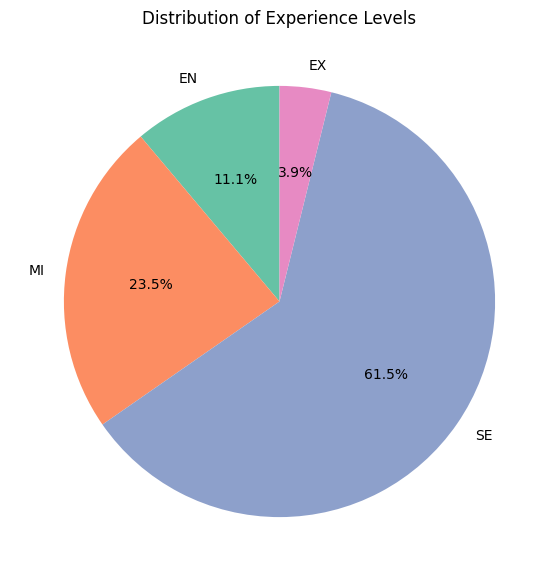

In [1529]:
import matplotlib.pyplot as plt

# Define the correct order of experience levels
level_order = ["EN", "MI", "SE", "EX"]

# Convert to categorical with specified order
salaries_data_frame["experience_level"] = pd.Categorical(
    salaries_data_frame["experience_level"], categories=level_order, ordered=True
)

# Count occurrences in the specified order
experience_level_counts = salaries_data_frame["experience_level"].value_counts().sort_index()

# Calculate percentages
experience_level_percent = (
    experience_level_counts / experience_level_counts.sum() * 100
).round(1)

# Combine into a DataFrame
result = pd.DataFrame(
    {"count": experience_level_counts, "percentage": experience_level_percent}
)
print(result)

# --- Pie Chart ---
plt.figure(figsize=(7, 7))
plt.pie(
    experience_level_counts, 
    labels=experience_level_counts.index, 
    autopct="%1.1f%%", 
    startangle=90,
    colors=['#66c2a5','#fc8d62','#8da0cb','#e78ac3']
)
plt.title("Distribution of Experience Levels")
plt.show()


#### Employment Type

Employment type distribution:  
- **Full-time (FT)** dominates with **98.2%** of all records, showing that almost all roles are full-time.  
- **Part-time (PT)**, **Contract (CT)**, and **Freelance (FL)** together make up less than **2%** of the dataset.  

➡️ The dataset is overwhelmingly focused on **full-time employment**.

                 count  percentage
employment_type                   
FL                   6         0.4
CT                   9         0.6
PT                  12         0.8
FT                1473        98.2


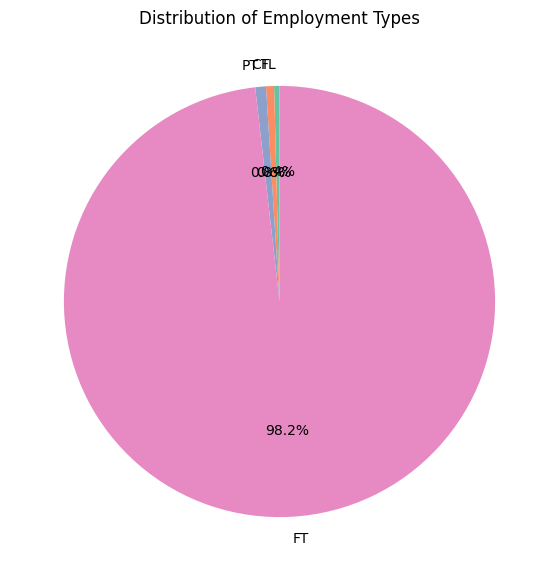

In [1530]:
import matplotlib.pyplot as plt

# Define custom order
order = ["FL", "CT", "PT", "FT"]

# Count occurrences of each employment_type
employment_type_counts = salaries_data_frame["employment_type"].value_counts()

# Reorder according to the custom order
employment_type_counts = employment_type_counts.reindex(order)

# Calculate percentages
employment_type_percent = (
    employment_type_counts / employment_type_counts.sum() * 100
).round(2)

# Combine into one DataFrame
result = pd.DataFrame(
    {"count": employment_type_counts, "percentage": employment_type_percent}
)

print(result)

# --- Pie Chart ---
plt.figure(figsize=(7, 7))
plt.pie(
    employment_type_counts, 
    labels=employment_type_counts.index, 
    autopct="%1.1f%%", 
    startangle=90,
    colors=['#66c2a5','#fc8d62','#8da0cb','#e78ac3']
)
plt.title("Distribution of Employment Types")
plt.show()


#### Job Title

The dataset contains **69 unique job titles**.  

- The most common roles are **Data Engineer (24.4%)**, **Data Scientist (24.0%)**, and **Data Analyst (14.0%)**.  
- Together, these three account for over **60%** of all records.  
- Roles like **Machine Learning Engineer (7.1%)** are present in smaller numbers, while many niche titles appear only once.  
- When grouped, about **30.5%** of jobs fall into the "Others" category, highlighting a long tail of less frequent roles.  

➡️ The dataset is dominated by core data roles, while specialized or managerial positions are relatively rare.

In [1531]:
import pandas as pd

# Count all job titles and calculate their percentages
job_counts = salaries_data_frame["job_title"].value_counts()
total_jobs = job_counts.sum()

# Create a DataFrame with count and percentage for every job title
all_job_titles = job_counts.to_frame("count").reset_index()
all_job_titles.columns = ["job_title", "count"]
all_job_titles["percentage"] = (all_job_titles["count"] / total_jobs * 100).round(2)

# Add accumulated count and percentage
all_job_titles["accumulated_count"] = all_job_titles["count"].cumsum()
all_job_titles["accumulated_percentage"] = (
    all_job_titles["accumulated_count"] / total_jobs * 100
).round(2)

# Print the total number of unique job titles
print(f"Number of unique job titles: {len(all_job_titles)}")

# Print all job titles with their counts, percentages, and accumulated values
pd.set_option("display.max_rows", None)  # Show all rows in output
print("\nAll job titles with accumulation:")
print(all_job_titles)

Number of unique job titles: 69

All job titles with accumulation:
                                   job_title  count  percentage  \
0                              Data Engineer    366       24.40   
1                             Data Scientist    360       24.00   
2                               Data Analyst    210       14.00   
3                  Machine Learning Engineer    106        7.07   
4                         Analytics Engineer     53        3.53   
5                             Data Architect     39        2.60   
6                          Applied Scientist     30        2.00   
7                       Data Science Manager     29        1.93   
8                         Research Scientist     27        1.80   
9                 Machine Learning Scientist     17        1.13   
10                         Research Engineer     14        0.93   
11                  Computer Vision Engineer     12        0.80   
12                               ML Engineer     12        0.8

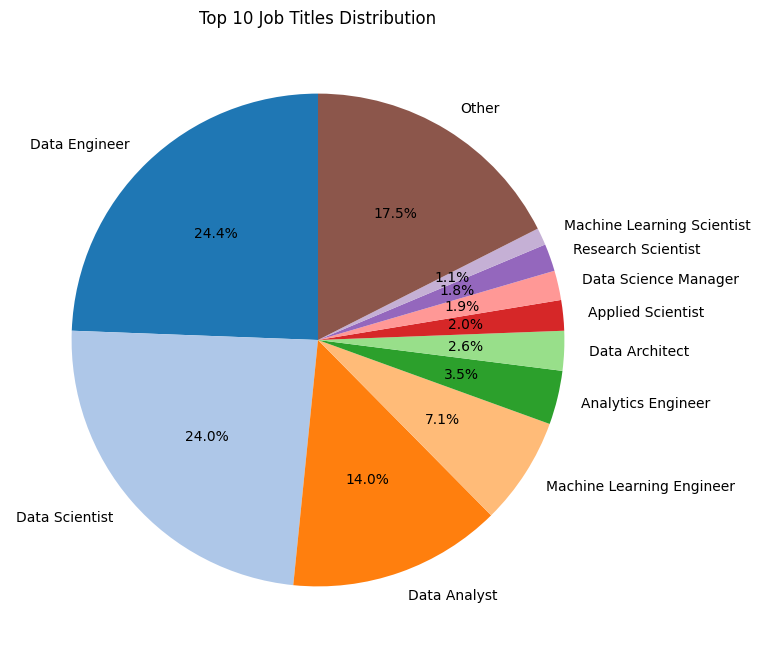

In [1532]:
import matplotlib.pyplot as plt
import pandas as pd

# Count all job titles and calculate percentages
job_counts = salaries_data_frame["job_title"].value_counts()
total_jobs = job_counts.sum()

# Keep top 10 job titles and group the rest as 'Other'
top_n = 10
top_jobs = job_counts.head(top_n)
other_count = total_jobs - top_jobs.sum()

# Use pd.concat to combine top jobs and 'Other'
job_counts_for_pie = pd.concat([top_jobs, pd.Series({"Other": other_count})])

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(
    job_counts_for_pie, 
    labels=job_counts_for_pie.index, 
    autopct="%1.1f%%", 
    startangle=90,
    colors=plt.cm.tab20.colors  # color map for slices
)
plt.title(f"Top {top_n} Job Titles Distribution")
plt.show()


In [1533]:
# Count combinations
combo_counts = salaries_data_frame.value_counts(
    subset=["job_title", "experience_level"]
).reset_index(name="count")

# Sort by count descending
combo_counts = combo_counts.sort_values(by="count", ascending=False)

# Calculate percentage
total = combo_counts["count"].sum()
combo_counts["percentage"] = (combo_counts["count"] / total * 100).round(2)

# Calculate accumulated count and percentage
combo_counts["accumulated_count"] = combo_counts["count"].cumsum()
combo_counts["accumulated_percentage"] = combo_counts["percentage"].cumsum().round(2)

# Reset index for readability
combo_counts = combo_counts.reset_index(drop=True)

print(combo_counts)


                                    job_title experience_level  count  \
0                              Data Scientist               SE    242   
1                               Data Engineer               SE    231   
2                                Data Analyst               SE    130   
3                               Data Engineer               MI     90   
4                              Data Scientist               MI     81   
5                   Machine Learning Engineer               SE     70   
6                                Data Analyst               MI     50   
7                          Analytics Engineer               SE     43   
8                              Data Scientist               EN     33   
9                              Data Architect               SE     32   
10                              Data Engineer               EN     30   
11                               Data Analyst               EN     28   
12                          Applied Scientist      

#### Countries

Number of unique company locations: 58

All company locations:
                  count  percentage  accumulated_count  accumulated_percentage
company_location                                                              
US                 1101       73.40               1101                   73.40
GB                   91        6.07               1192                   79.47
CA                   50        3.33               1242                   82.80
IN                   37        2.47               1279                   85.27
DE                   35        2.33               1314                   87.60
ES                   29        1.93               1343                   89.53
FR                   20        1.33               1363                   90.87
GR                   13        0.87               1376                   91.73
NL                   11        0.73               1387                   92.47
JP                    6        0.40               1393              

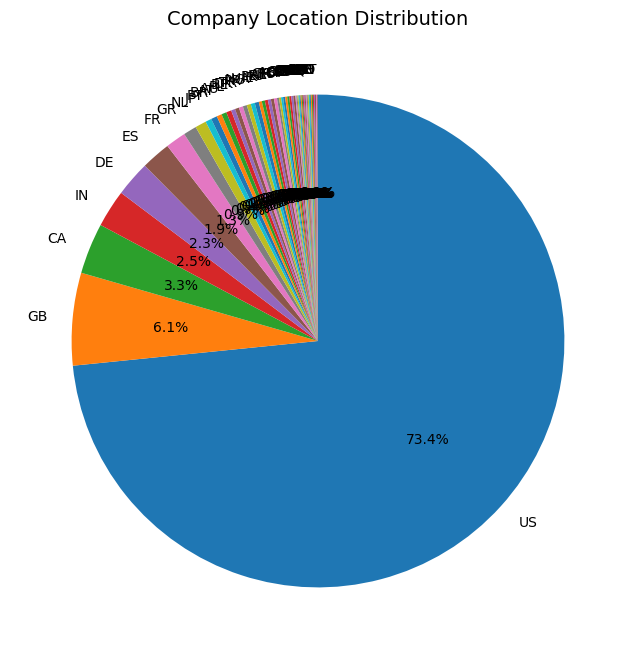

In [1534]:
import pandas as pd
import matplotlib.pyplot as plt

# Count all company locations and calculate their percentages
location_counts = salaries_data_frame["company_location"].value_counts()
total_locations = location_counts.sum()

# Create a DataFrame with count and percentage for every company location
all_locations = location_counts.to_frame("count")
all_locations["percentage"] = (all_locations["count"] / total_locations * 100).round(2)

# Add accumulated count and percentage
all_locations["accumulated_count"] = all_locations["count"].cumsum()
all_locations["accumulated_percentage"] = (
    all_locations["accumulated_count"] / total_locations * 100
).round(2)

# Print the total number of unique company locations
print(f"Number of unique company locations: {len(all_locations)}")

# Print all company locations with their counts and percentages
pd.set_option("display.max_rows", None)  # Show all rows in output
print("\nAll company locations:")
print(all_locations)

# ===== Draw Pie Chart =====
plt.figure(figsize=(8, 8))
plt.pie(
    all_locations["count"],
    labels=all_locations.index,  # company_location is the index
    autopct="%1.1f%%",
    startangle=90,
    counterclock=False,
)
plt.title("Company Location Distribution", fontsize=14)
plt.show()

Number of unique employee residences: 61

All employee residences:
                    count  percentage  accumulated_count  \
employee_residence                                         
US                   1074       71.60               1074   
GB                     86        5.73               1160   
CA                     48        3.20               1208   
IN                     46        3.07               1254   
ES                     31        2.07               1285   
DE                     30        2.00               1315   
FR                     24        1.60               1339   
GR                     15        1.00               1354   
NL                     12        0.80               1366   
PT                     10        0.67               1376   
BR                      8        0.53               1384   
JP                      7        0.47               1391   
PK                      6        0.40               1397   
AU                      6        

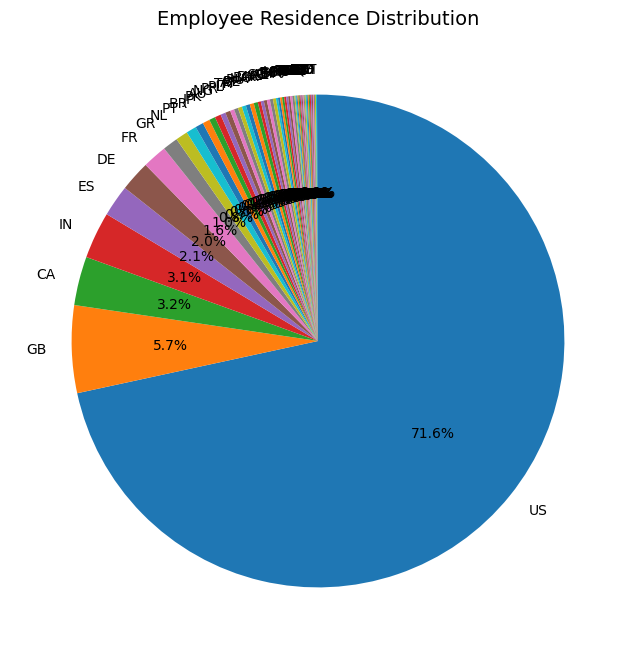

In [1535]:
import pandas as pd
import matplotlib.pyplot as plt

# Count all employee residences and calculate their percentages
residence_counts = salaries_data_frame["employee_residence"].value_counts()
total_residences = residence_counts.sum()

# Create a DataFrame with count and percentage for every employee residence
all_residences = residence_counts.to_frame("count")
all_residences["percentage"] = (all_residences["count"] / total_residences * 100).round(
    2
)

# Add accumulated count and percentage
all_residences["accumulated_count"] = all_residences["count"].cumsum()
all_residences["accumulated_percentage"] = (
    all_residences["accumulated_count"] / total_residences * 100
).round(2)

# Print the total number of unique employee residences
print(f"Number of unique employee residences: {len(all_residences)}")

# Print all employee residences with their counts and percentages
pd.set_option("display.max_rows", None)  # Show all rows in output
print("\nAll employee residences:")
print(all_residences)

# ===== Draw Pie Chart =====
plt.figure(figsize=(8, 8))
plt.pie(
    all_residences["count"],
    labels=all_residences.index,  # employee_residence is the index
    autopct="%1.1f%%",
    startangle=90,
    counterclock=False,
)
plt.title("Employee Residence Distribution", fontsize=14)
plt.show()

#### Remote Ratio

              count  percentage
remote_ratio                   
0               579       38.60
50              130        8.67
100             791       52.73


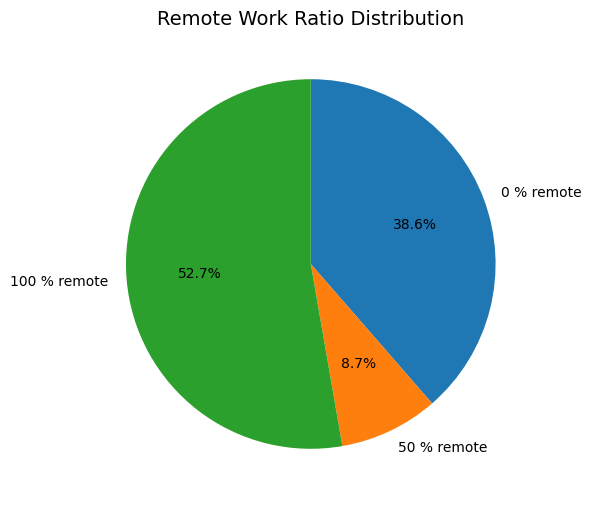

In [1536]:
import pandas as pd
import matplotlib.pyplot as plt

# Define custom order
order = [0, 50, 100]

# Count occurrences of each remote_ratio
remote_ratio_counts = salaries_data_frame["remote_ratio"].value_counts()

# Reorder according to the custom order
remote_ratio_counts = remote_ratio_counts.reindex(order)

# Calculate percentages
remote_ratio_percent = (remote_ratio_counts / remote_ratio_counts.sum() * 100).round(2)

# Combine into one DataFrame
result = pd.DataFrame(
    {"count": remote_ratio_counts, "percentage": remote_ratio_percent}
)

print(result)

# ===== Draw Pie Chart =====
plt.figure(figsize=(6, 6))
plt.pie(
    result["count"],
    labels=result.index.astype(str) + " % remote",
    autopct="%1.1f%%",
    startangle=90,
    counterclock=False,
)
plt.title("Remote Work Ratio Distribution", fontsize=14)
plt.show()

#### Company Size

              count  percentage
company_size                   
S               107        7.13
M              1073       71.53
L               320       21.33


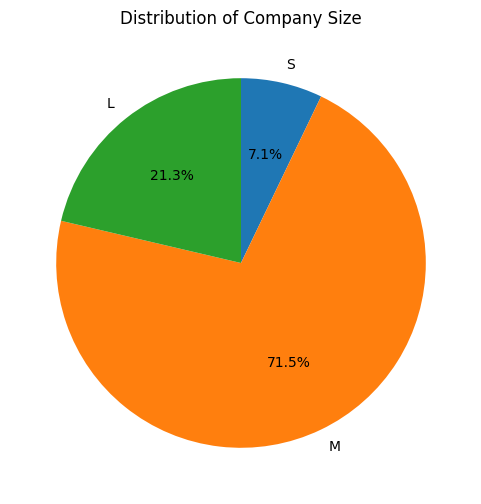

In [1537]:
import matplotlib.pyplot as plt

# Define custom order
order = ["S", "M", "L"]

# Count occurrences of each company_size
company_size_counts = salaries_data_frame["company_size"].value_counts()

# Reorder according to the custom order
company_size_counts = company_size_counts.reindex(order)

# Calculate percentages
company_size_percent = (company_size_counts / company_size_counts.sum() * 100).round(2)

# Combine into one DataFrame
result = pd.DataFrame(
    {"count": company_size_counts, "percentage": company_size_percent}
)

print(result)

# ========================
# Pie chart visualization
# ========================
plt.figure(figsize=(6, 6))
plt.pie(
    company_size_counts,
    labels=order,
    autopct="%1.1f%%",
    startangle=90,
    counterclock=False,
)
plt.title("Distribution of Company Size")
plt.show()

### Key Insights

#### Salary Distribution

The salary distribution in the dataset shows a **wide range**, spanning from **$5,409** at the lowest to **$450,000** at the highest.  

- **Mean salary:** $130,934  
- **Median salary:** $130,000  
- **Skewness:** 0.59  

The closeness of the mean and median suggests that the distribution is relatively balanced, with no extreme distortion caused by outliers.  

The **skewness value of 0.59** indicates a **moderate positive skew**, meaning:  

- Salaries are more clustered toward the lower end of the scale.  
- A smaller number of very high salaries pull the average upward.  

In practical terms, most professionals earn closer to the median, but a select group commands significantly higher pay, contributing to the extended right tail of the distribution.  

Salary ranges from $5,409 to $450,000
Mean salary: $130,934
Median salary: $130,000
Skewness: 0.59


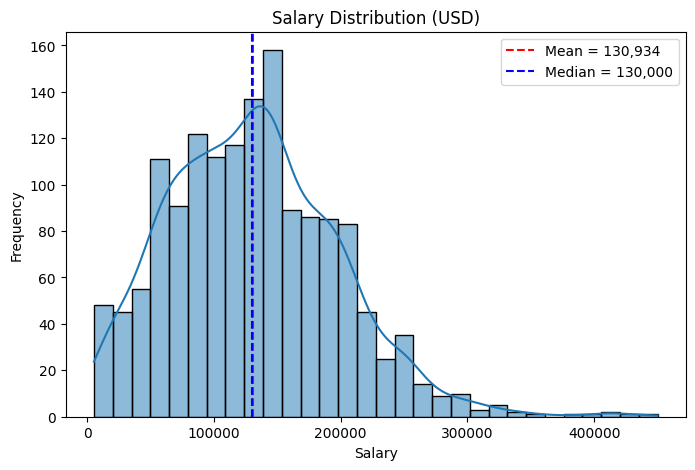

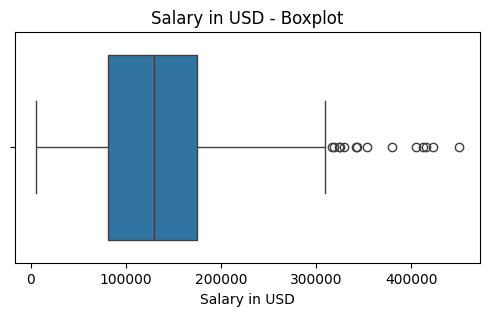

In [1538]:
import matplotlib.pyplot as plt
import seaborn as sns


salary_in_usd_series = salaries_data_frame["salary_in_usd"]


# --- 1. Descriptive statistics ---
mean_salary = salary_in_usd_series.mean()
median_salary = salary_in_usd_series.median()
min_salary = salary_in_usd_series.min()
max_salary = salary_in_usd_series.max()


print(f"Salary ranges from ${min_salary:,.0f} to ${max_salary:,.0f}")
print(f"Mean salary: ${mean_salary:,.0f}")
print(f"Median salary: ${median_salary:,.0f}")


# Skew check
skewness = salary_in_usd_series.skew()
print(f"Skewness: {skewness:.2f}")


# --- 2. Histogram ---
plt.figure(figsize=(8, 5))
sns.histplot(salary_in_usd_series, bins=30, kde=True)
plt.axvline(
    mean_salary, color="red", linestyle="--", label=f"Mean = {mean_salary:,.0f}"
)
plt.axvline(
    median_salary, color="blue", linestyle="--", label=f"Median = {median_salary:,.0f}"
)
plt.title("Salary Distribution (USD)")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.legend()
plt.show()


# --- 3. Boxplot (to reveal outliers) ---
plt.figure(figsize=(6, 3))
sns.boxplot(x=salary_in_usd_series)
plt.title("Salary in USD - Boxplot")
plt.xlabel("Salary in USD")
plt.show()

#### Salary by Experience Levels

Mean and Median Salaries by Experience Level:
                      Mean    Median
experience_level                    
EN                 69627.0   60000.0
MI                 95473.0   84053.0
SE                151640.0  145000.0
EX                192463.0  188518.0


/var/folders/jh/z981c7zj0vz0gmyfc8mhdxdr0000gn/T/ipykernel_41289/2651735718.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salaries_data_frame.groupby("experience_level")["salary_in_usd"]


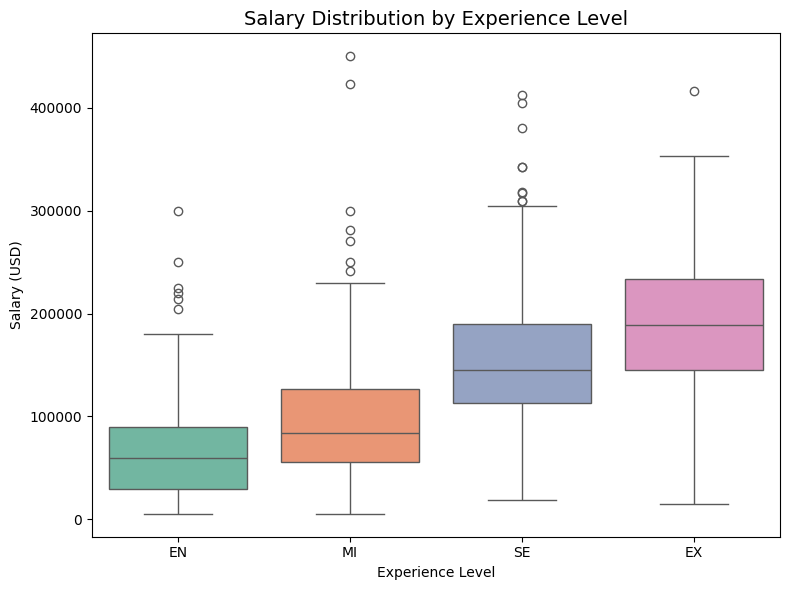

In [1539]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure correct order of experience levels
experience_level_order = ["EN", "MI", "SE", "EX"]
salaries_data_frame["experience_level"] = pd.Categorical(
    salaries_data_frame["experience_level"],
    categories=experience_level_order,
    ordered=True,
)

# ========================
# Mean and median table
# ========================
summary_table = (
    salaries_data_frame.groupby("experience_level")["salary_in_usd"]
    .agg(Mean="mean", Median="median")
    .round(0)
)

print("Mean and Median Salaries by Experience Level:")
print(summary_table)

# ========================
# Boxplot
# ========================
plt.figure(figsize=(8, 6))

sns.boxplot(
    data=salaries_data_frame,
    x="experience_level",
    y="salary_in_usd",
    order=experience_level_order,
    palette="Set2",
    hue="experience_level",
    legend=False,
)

plt.title("Salary Distribution by Experience Level", fontsize=14)
plt.ylabel("Salary (USD)")
plt.xlabel("Experience Level")
plt.tight_layout()
plt.show()

#### Salary by Job Titles

/var/folders/jh/z981c7zj0vz0gmyfc8mhdxdr0000gn/T/ipykernel_41289/4021604689.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Mean and Median Salaries by Major Job Title:
                               Mean    Median
job_title                                    
Machine Learning Engineer  145421.0  141942.0
Data Scientist             135659.0  141300.0
Data Engineer              131523.0  130000.0
Data Analyst               100195.0  100000.0


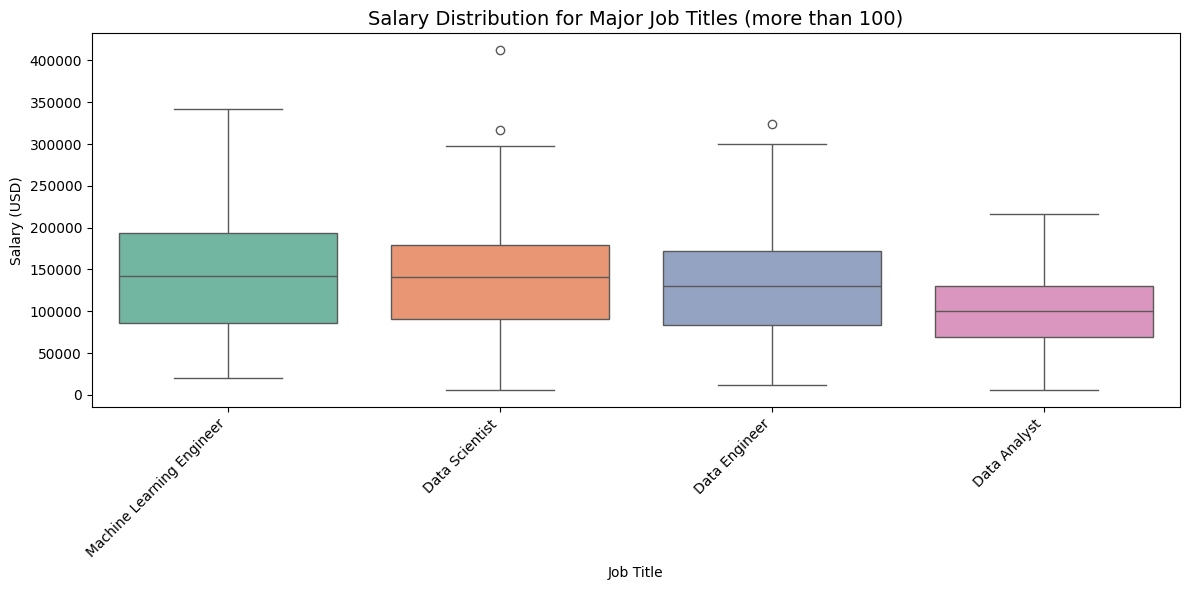

In [1540]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Count job titles
job_counts = salaries_data_frame["job_title"].value_counts()

# Get major roles (threshold >= 100)
threshold = 100
major_roles = job_counts[job_counts >= threshold].index

# Filter dataframe to include only major roles
salaries_data_frame_major_roles = salaries_data_frame[
    salaries_data_frame["job_title"].isin(major_roles)
]

# Sort job titles by median salary
job_order = (
    salaries_data_frame_major_roles.groupby("job_title")["salary_in_usd"]
    .median()
    .sort_values(ascending=False)
    .index
)


# ========================
# Mean and median table
# ========================
summary_table = (
    salaries_data_frame_major_roles.groupby("job_title")["salary_in_usd"]
    .agg(Mean="mean", Median="median")
    .round(0)
    .loc[job_order]
)  # keep the same order as the boxplot

print("Mean and Median Salaries by Major Job Title:")
print(summary_table)

# ========================
# Boxplot: Salary distribution by sorted job titles
# ========================
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=salaries_data_frame_major_roles,
    x="job_title",
    y="salary_in_usd",
    palette="Set2",
    order=job_order,
)

plt.xticks(rotation=45, ha="right")
plt.title("Salary Distribution for Major Job Titles (more than 100)", fontsize=14)
plt.ylabel("Salary (USD)")
plt.xlabel("Job Title")
plt.tight_layout()
plt.show()

#### Salary by Employees Region

=== Top 10 Regions by Average Salary ===
employee_residence  avg_salary_usd  median_salary_usd
                MY   200000.000000           200000.0
                PR   166000.000000           160000.0
                US   153964.053371           145000.0
                NZ   125000.000000           125000.0
                CA   118216.583333            99851.5
                IE   117764.333333           113750.0
                DO   110000.000000           110000.0
                RU   105750.000000            72500.0
                JP   103537.714286            74000.0
                JE   100000.000000           100000.0

=== Bottom 10 Regions by Average Salary ===
employee_residence  avg_salary_usd  median_salary_usd
                PK    27036.166667            16000.0
                RS    25532.000000            25532.0
                EG    22800.000000            22800.0
                CO    21844.000000            21844.0
                TR    21322.500000            2258

/var/folders/jh/z981c7zj0vz0gmyfc8mhdxdr0000gn/T/ipykernel_41289/3547044544.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


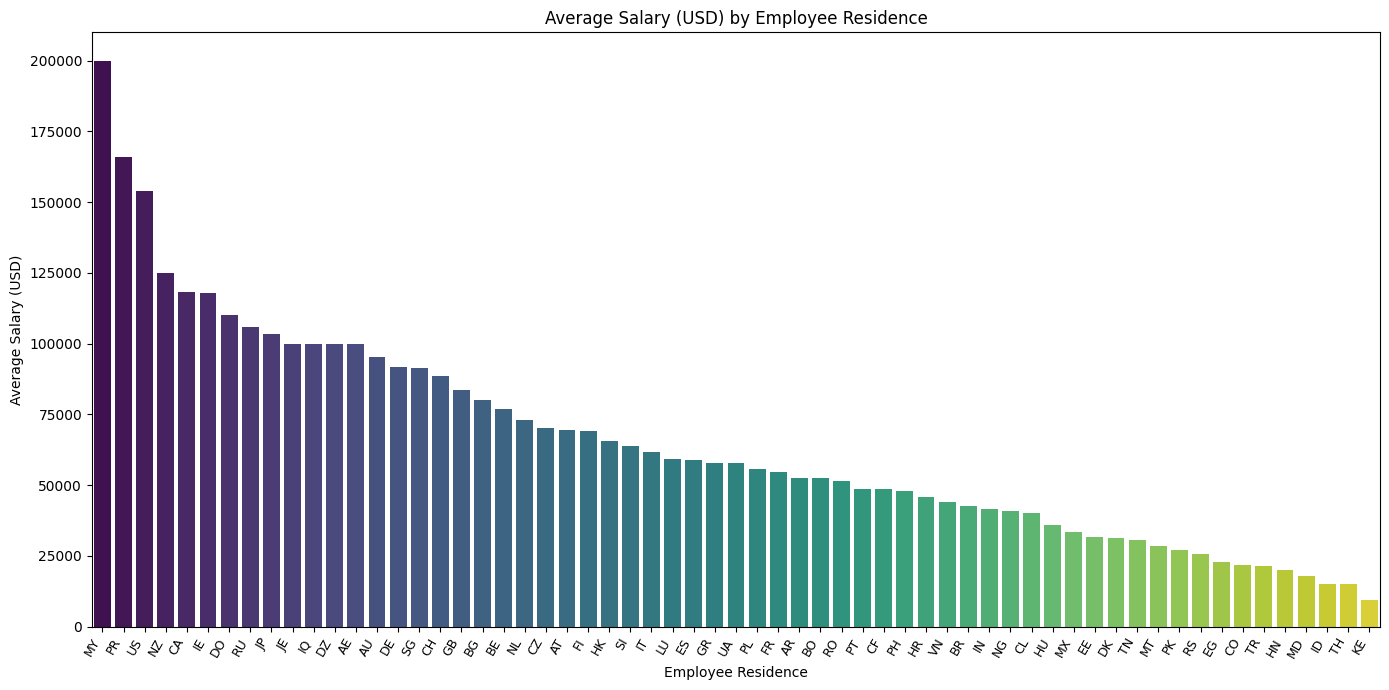

In [1541]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute both mean and median salary per region
region_salary_stats = (
    salaries_data_frame.groupby("employee_residence")["salary_in_usd"]
    .agg(avg_salary_usd="mean", median_salary_usd="median")
    .reset_index()
)

# Sort regions by average salary
region_salary_stats_sorted = region_salary_stats.sort_values(
    by="avg_salary_usd", ascending=False
).reset_index(drop=True)

# Show tables: Top 10 and Bottom 10
top10 = region_salary_stats_sorted.head(10)
bottom10 = region_salary_stats_sorted.tail(10)

print("=== Top 10 Regions by Average Salary ===")
print(top10.to_string(index=False))

print("\n=== Bottom 10 Regions by Average Salary ===")
print(bottom10.to_string(index=False))

# --- Bar chart with ALL regions sorted by avg salary ---
plt.figure(figsize=(14, 7))
sns.barplot(
    data=region_salary_stats_sorted,
    x="employee_residence",
    y="avg_salary_usd",
    palette="viridis",
)
plt.title("Average Salary (USD) by Employee Residence")
plt.xlabel("Employee Residence")
plt.ylabel("Average Salary (USD)")
plt.xticks(rotation=60, ha="right", fontsize=9)
plt.tight_layout()
plt.show()

#### Salary by Company Locations

=== Top 10 Regions by Average Salary ===
company_location  avg_salary_usd  median_salary_usd
              PR   167500.000000           167500.0
              RU   157500.000000           157500.0
              US   152070.118721           145000.0
              NZ   125000.000000           125000.0
              IL   119059.000000           119059.0
              IE   117764.333333           113750.0
              CA   117372.680000            97908.0
              JP   114127.333333            75682.0
              AU   100833.800000            83864.0
              CN   100000.000000           100000.0

=== Bottom 10 Regions by Average Salary ===
company_location  avg_salary_usd  median_salary_usd
              EG    22800.000000            22800.0
              CO    21844.000000            21844.0
              TR    21322.500000            22585.5
              HN    20000.000000            20000.0
              MD    18000.000000            18000.0
              TH    15000.0000

/var/folders/jh/z981c7zj0vz0gmyfc8mhdxdr0000gn/T/ipykernel_41289/2804446221.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


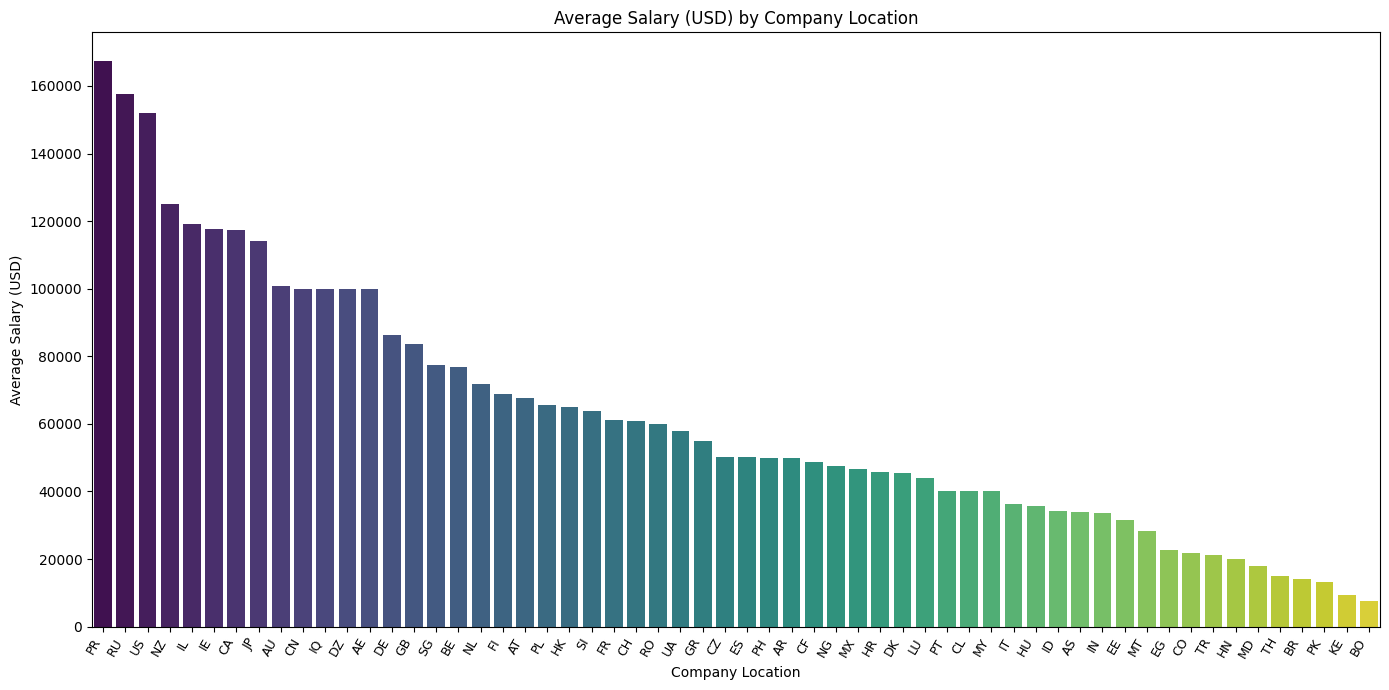

In [1542]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute both mean and median salary per region
region_salary_stats = (
    salaries_data_frame.groupby("company_location")["salary_in_usd"]
    .agg(avg_salary_usd="mean", median_salary_usd="median")
    .reset_index()
)

# Sort regions by average salary
region_salary_stats_sorted = region_salary_stats.sort_values(
    by="avg_salary_usd", ascending=False
).reset_index(drop=True)

# Show tables: Top 10 and Bottom 10
top10 = region_salary_stats_sorted.head(10)
bottom10 = region_salary_stats_sorted.tail(10)

print("=== Top 10 Regions by Average Salary ===")
print(top10.to_string(index=False))

print("\n=== Bottom 10 Regions by Average Salary ===")
print(bottom10.to_string(index=False))

# --- Bar chart with ALL regions sorted by avg salary ---
plt.figure(figsize=(14, 7))
sns.barplot(
    data=region_salary_stats_sorted,
    x="company_location",
    y="avg_salary_usd",
    palette="viridis",
)
plt.title("Average Salary (USD) by Company Location")
plt.xlabel("Company Location")
plt.ylabel("Average Salary (USD)")
plt.xticks(rotation=60, ha="right", fontsize=9)
plt.tight_layout()
plt.show()

#### Salary by Company Location and Company Size

=== Average Salary by Company Size ===
company_size     mean   median
           S  $77,723  $61,566
           M $139,114 $137,270
           L $121,396 $112,300


/var/folders/jh/z981c7zj0vz0gmyfc8mhdxdr0000gn/T/ipykernel_41289/3127765729.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/jh/z981c7zj0vz0gmyfc8mhdxdr0000gn/T/ipykernel_41289/3127765729.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salaries_data_frame.groupby("company_size")["salary_in_usd"]


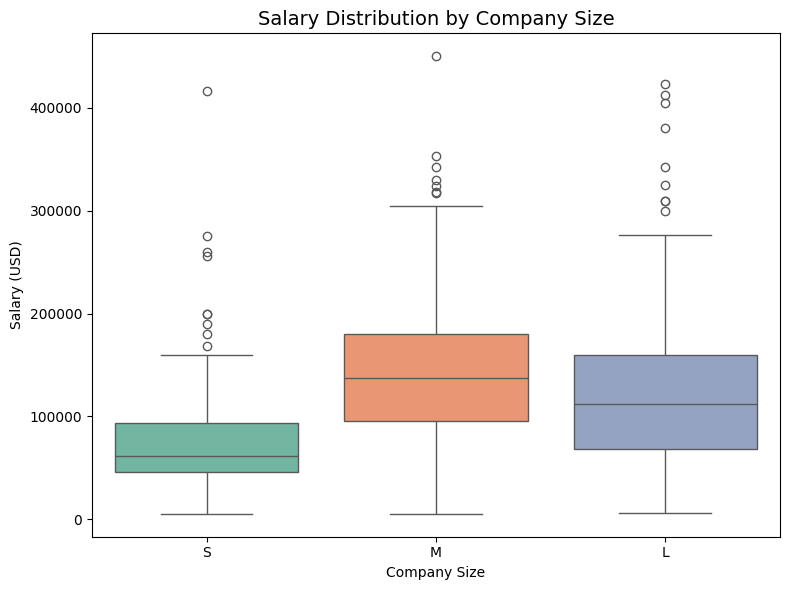

In [1543]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure company_size is ordered as S, M, L
salaries_data_frame["company_size"] = pd.Categorical(
    salaries_data_frame["company_size"], categories=["S", "M", "L"], ordered=True
)

plt.figure(figsize=(8, 6))
sns.boxplot(
    data=salaries_data_frame, x="company_size", y="salary_in_usd", palette="Set2"
)

# Group by company_size and calculate mean & median
company_summary = (
    salaries_data_frame.groupby("company_size")["salary_in_usd"]
    .agg(["mean", "median"])
    .reset_index()
    .sort_values("company_size")  # respects categorical order
)

# Format numbers with commas and USD style
company_summary["mean"] = company_summary["mean"].map("${:,.0f}".format)
company_summary["median"] = company_summary["median"].map("${:,.0f}".format)

print("=== Average Salary by Company Size ===")
print(company_summary.to_string(index=False))

plt.title("Salary Distribution by Company Size", fontsize=14)
plt.xlabel("Company Size")
plt.ylabel("Salary (USD)")
plt.tight_layout()
plt.show()

#### Salary by Remote Ratio

=== Average Salary by Remote Ratio ===
 remote_ratio     mean   median
            0 $143,867 $139,430
           50  $81,360  $65,135
          100 $129,658 $131,050


/var/folders/jh/z981c7zj0vz0gmyfc8mhdxdr0000gn/T/ipykernel_41289/2825536966.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=salaries_data_frame, x="remote_ratio", y="salary_in_usd", palette="Set2")


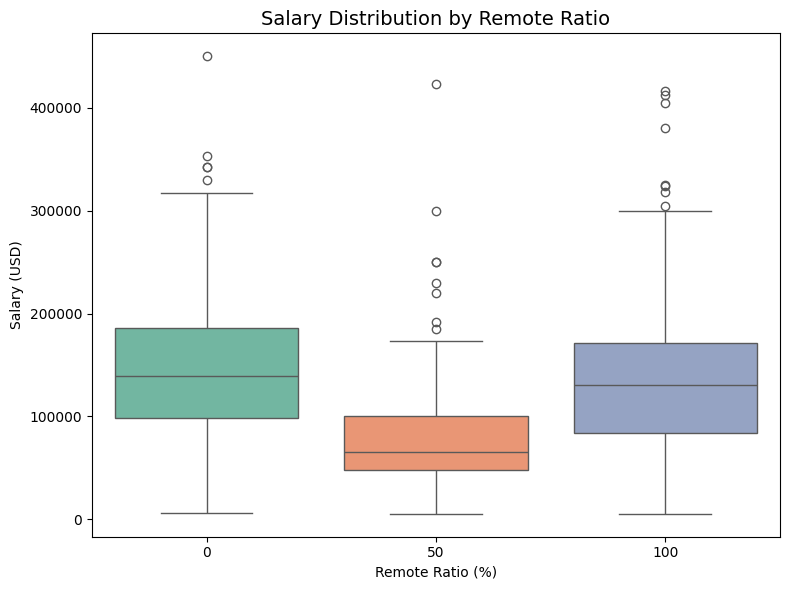

In [1544]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(data=salaries_data_frame, x="remote_ratio", y="salary_in_usd", palette="Set2")


# Group by remote_ratio and calculate mean & median
remote_summary = (
    salaries_data_frame.groupby("remote_ratio")["salary_in_usd"]
    .agg(["mean", "median"])
    .reset_index()
)

# Format numbers with commas and USD style
remote_summary["mean"] = remote_summary["mean"].map("${:,.0f}".format)
remote_summary["median"] = remote_summary["median"].map("${:,.0f}".format)

print("=== Average Salary by Remote Ratio ===")
print(remote_summary.to_string(index=False))

plt.title("Salary Distribution by Remote Ratio", fontsize=14)
plt.xlabel("Remote Ratio (%)")
plt.ylabel("Salary (USD)")
plt.tight_layout()
plt.show()

## Data Preparation and Model Training

### Feature Selection

### Handling Data Issues

#### Missing Values Issues

In [1545]:
# Drop rows with any missing values
salaries_data_frame = salaries_data_frame.dropna()
salaries_data_frame.shape

(1494, 11)

#### Employment Type Issues

In [1546]:
# Keep only full-time employees
salaries_data_frame = salaries_data_frame[salaries_data_frame["employment_type"] == "FT"]  # assuming "FT" is the code for full-time
salaries_data_frame.shape

(1467, 11)

#### Job Titles Issues

In [1547]:
# ===== FILTER OUT JOB TITLES WITH FEWER THAN 100 RECORDS =====
threshold = 100
job_counts = salaries_data_frame["job_title"].value_counts()
salaries_data_frame = salaries_data_frame[salaries_data_frame["job_title"].isin(job_counts[job_counts >= threshold].index)]
salaries_data_frame.shape

(1030, 11)

#### Salary Distribution after Filter

Salary ranges from $5,679 to $412,000
Mean salary: $128,589
Median salary: $129,300
Skewness: 0.43


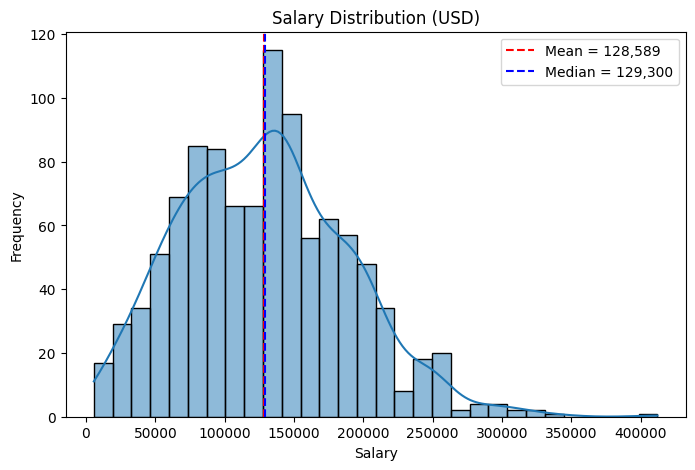

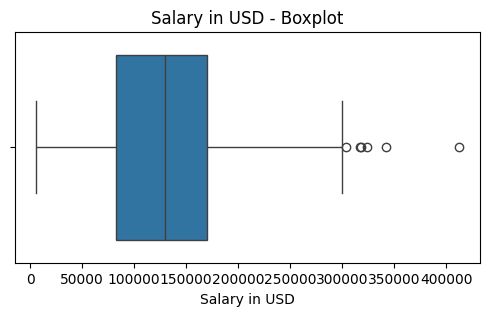


Number of outliers: 6
Outlier rows:
      work_year experience_level employment_type                  job_title  \
358        2023               SE              FT  Machine Learning Engineer   
488        2023               SE              FT             Data Scientist   
145        2023               SE              FT  Machine Learning Engineer   
1155       2022               EX              FT              Data Engineer   
133        2023               SE              FT  Machine Learning Engineer   
1495       2020               SE              FT             Data Scientist   

        salary salary_currency  salary_in_usd employee_residence  \
358   304000.0             USD       304000.0                 US   
488   317070.0             USD       317070.0                 US   
145   318300.0             USD       318300.0                 US   
1155  324000.0             USD       324000.0                 US   
133   342300.0             USD       342300.0                 US   
1

In [1548]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Descriptive statistics ---
salary_in_usd_series = salaries_data_frame["salary_in_usd"]

mean_salary = salary_in_usd_series.mean()
median_salary = salary_in_usd_series.median()
min_salary = salary_in_usd_series.min()
max_salary = salary_in_usd_series.max()

print(f"Salary ranges from ${min_salary:,.0f} to ${max_salary:,.0f}")
print(f"Mean salary: ${mean_salary:,.0f}")
print(f"Median salary: ${median_salary:,.0f}")

# Skew check
skewness = salary_in_usd_series.skew()
print(f"Skewness: {skewness:.2f}")


# --- 2. Histogram ---
plt.figure(figsize=(8, 5))
sns.histplot(salary_in_usd_series, bins=30, kde=True)
plt.axvline(
    mean_salary, color="red", linestyle="--", label=f"Mean = {mean_salary:,.0f}"
)
plt.axvline(
    median_salary, color="blue", linestyle="--", label=f"Median = {median_salary:,.0f}"
)
plt.title("Salary Distribution (USD)")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.legend()
plt.show()


# --- 3. Boxplot (to reveal outliers) ---
plt.figure(figsize=(6, 3))
sns.boxplot(x=salary_in_usd_series)
plt.title("Salary in USD - Boxplot")
plt.xlabel("Salary in USD")
plt.show()


# --- 4. Identify outliers using IQR rule ---
Q1 = salary_in_usd_series.quantile(0.25)
Q3 = salary_in_usd_series.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = salaries_data_frame[(salaries_data_frame["salary_in_usd"] < lower_bound) | (salaries_data_frame["salary_in_usd"] > upper_bound)]

print(f"\nNumber of outliers: {len(outliers)}")
print("Outlier rows:")
print(outliers.sort_values("salary_in_usd"))


# --- 5. Remove outliers ---
print(f"\nData shape before removing outliers: {salaries_data_frame.shape}")

salaries_data_frame = salaries_data_frame[
    (salaries_data_frame["salary_in_usd"] >= lower_bound) & (salaries_data_frame["salary_in_usd"] <= upper_bound)
].copy()

print(f"Data shape after removing outliers: {salaries_data_frame.shape}")

### Model Training and Performance (Supervised Learning)

#### First Try

In [1549]:
# ========================
# 1. Import libraries
# ========================
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder


print(salaries_data_frame.shape)

# ========================
# 2. Define features & target
# ========================
categorical_cols = [
    "experience_level",
    "job_title",
    "employee_residence",
    "company_location",
    "company_size",
]
numeric_cols = ["remote_ratio"]
features = categorical_cols + numeric_cols

X = salaries_data_frame[features]
X.shape

y = salaries_data_frame["salary_in_usd"]
y.shape

# ========================
# 3. Split dataset
# ========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ========================
# 4. Preprocess features
# ========================
preprocessor_1 = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), numeric_cols),
    ]
)

X_train_processed = preprocessor_1.fit_transform(X_train)
X_test_processed = preprocessor_1.transform(X_test)

# ========================
# 5. Define models_1
# ========================
models_1 = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(
        n_estimators=500,
        max_depth=10,
        min_samples_leaf=2,
        max_features="sqrt",
        random_state=42,
        n_jobs=-1,
    ),
    "GradientBoosting": GradientBoostingRegressor(
        n_estimators=500, learning_rate=0.05, max_depth=5, random_state=42
    ),
    "XGBoost": XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
    ),
    "LightGBM": LGBMRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=-1,
        num_leaves=31,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        verbose=-1,
    ),
    "CatBoost": CatBoostRegressor(
        iterations=500, learning_rate=0.05, depth=6, random_state=42, verbose=0
    ),
}
# ========================
# 6. Train & evaluate
# ========================
results = {}
true_avg_salary = y_test.mean()  # True average salary

for name, model in models_1.items():
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)

    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    pred_avg_salary = y_pred.mean()  # Predicted average salary

    results[name] = {
        "RMSE": rmse,
        "RMSE % of Avg": (rmse / true_avg_salary) * 100,
        "MAE": mae,
        "MAE % of Avg": (mae / true_avg_salary) * 100,
        "R²": r2,
        "True Avg Salary": true_avg_salary,
        "Predicted Avg Salary": pred_avg_salary,
    }

# Convert to DataFrame for easy comparison
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="R²", ascending=False)

print(results_df.round(2))
print("\nBest model based on R²:", results_df.index[0])

(1024, 11)
                      RMSE  RMSE % of Avg       MAE  MAE % of Avg    R²  \
LinearRegression  35762.74          29.00  27385.69         22.21  0.62   
RandomForest      36751.52          29.80  29248.37         23.72  0.60   
CatBoost          36966.07          29.98  28581.21         23.18  0.59   
LightGBM          37853.95          30.70  30307.25         24.58  0.58   
GradientBoosting  37888.40          30.73  28769.98         23.33  0.57   
XGBoost           39276.33          31.85  29720.77         24.10  0.54   

                  True Avg Salary  Predicted Avg Salary  
LinearRegression        123309.06             120824.26  
RandomForest            123309.06             124106.12  
CatBoost                123309.06             124048.19  
LightGBM                123309.06             124148.50  
GradientBoosting        123309.06             124405.32  
XGBoost                 123309.06             125220.46  

Best model based on R²: LinearRegression


/opt/homebrew/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


##### Linear Regression

Linear Regression → RMSE: 35762.74, R²: 0.621


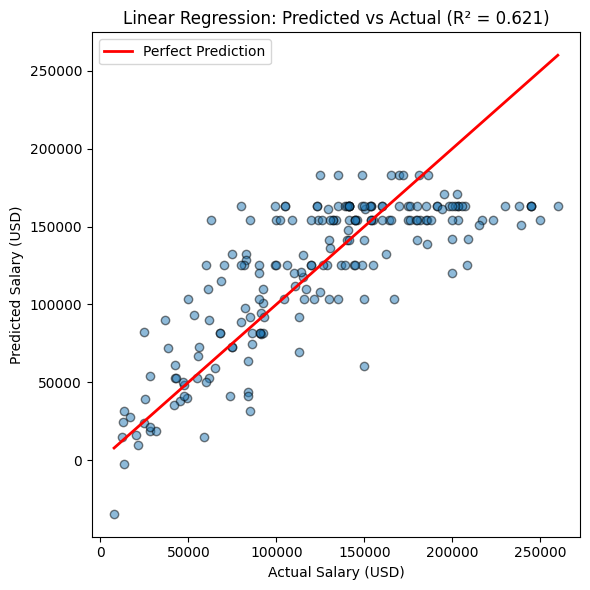

In [1550]:
import matplotlib.pyplot as plt

# Fit Linear Regression only
lin_model = LinearRegression()
lin_model.fit(X_train_processed, y_train)

# Predictions
y_pred_lin = lin_model.predict(X_test_processed)

# Evaluation
rmse = root_mean_squared_error(y_test, y_pred_lin)
r2 = r2_score(y_test, y_pred_lin)

print(f"Linear Regression → RMSE: {rmse:.2f}, R²: {r2:.3f}")

# ======== Plot Predicted vs Actual ========
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lin, alpha=0.5, edgecolor="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color="red", linewidth=2, label="Perfect Prediction")

plt.xlabel("Actual Salary (USD)")
plt.ylabel("Predicted Salary (USD)")
plt.title(f"Linear Regression: Predicted vs Actual (R² = {r2:.3f})")
plt.legend()
plt.tight_layout()
plt.show()


##### Features Importance


=== Aggregated Feature Importances (LinearRegression coefficients) ===
              feature     importance
0  employee_residence  870374.002466
1    company_location  805913.144172
2    experience_level  116335.128606
3           job_title   66494.832056
4        company_size   22893.529989
5        remote_ratio      42.901199


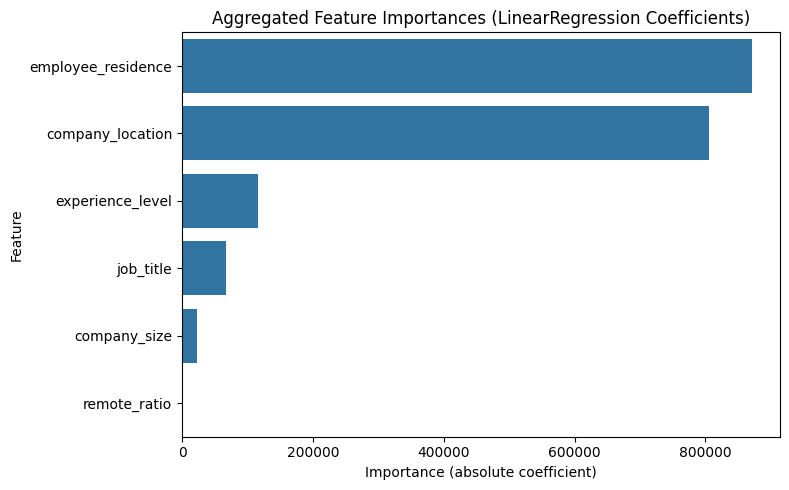

In [1551]:
# ========================
# 7. Aggregate feature importances by original feature (LinearRegression)
# ========================

# Get coefficients from LinearRegression
linreg_coefs = models_1["LinearRegression"].coef_

# Use same OHE feature names as before
ohe = preprocessor.named_transformers_["cat"]
ohe_features = ohe.get_feature_names_out(categorical_cols)
all_features = list(ohe_features) + numeric_cols

# Map back to original columns
def map_to_original(feature_name):
    for col in categorical_cols:
        if feature_name.startswith(col + "_"):
            return col
    if feature_name in numeric_cols:
        return feature_name
    return feature_name

original_features = [map_to_original(f) for f in all_features]

# Aggregate absolute coefficients as importance
feature_importance_salaries_data_frame = (
    pd.DataFrame({"feature": original_features, "importance": abs(linreg_coefs)})
    .groupby("feature")
    .sum()
    .sort_values(by="importance", ascending=False)
    .reset_index()
)

print("\n=== Aggregated Feature Importances (LinearRegression coefficients) ===")
print(feature_importance_salaries_data_frame)

# ========================
# 8. Visualize aggregated feature importances
# ========================
plt.figure(figsize=(8, 5))
sns.barplot(x="importance", y="feature", data=feature_importance_salaries_data_frame)
plt.title("Aggregated Feature Importances (LinearRegression Coefficients)")
plt.xlabel("Importance (absolute coefficient)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

##### Second Training

In [1552]:
# ========================
# 1. Import libraries
# ========================
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder


print(salaries_data_frame.shape)

# ========================
# 2. Define features & target
# ========================
features_2 = ["experience_level", "job_title", "employee_residence", "company_location"]

X = salaries_data_frame[features_2]
X.shape

y = salaries_data_frame["salary_in_usd"]
y.shape

# ========================
# 3. Split dataset
# ========================
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ========================
# 4. Preprocess features
# ========================
preprocessor_2 = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(handle_unknown="ignore"), features_2)]
)

X_train_processed_2 = preprocessor_2.fit_transform(X_train_2)
X_test_processed_2 = preprocessor_2.transform(X_test_2)

# ========================
# 5. Define models_2
# ========================
models_2 = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(
        n_estimators=500,
        max_depth=10,
        min_samples_leaf=2,
        max_features="sqrt",
        random_state=42,
        n_jobs=-1,
    ),
    "GradientBoosting": GradientBoostingRegressor(
        n_estimators=500, learning_rate=0.05, max_depth=5, random_state=42
    ),
    "XGBoost": XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
    ),
    "LightGBM": LGBMRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=-1,
        num_leaves=31,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        verbose=-1,
    ),
    "CatBoost": CatBoostRegressor(
        iterations=500, learning_rate=0.05, depth=6, random_state=42, verbose=0
    ),
}

# ========================
# 6. Train & evaluate
# ========================
results_2 = {}
true_avg_salary = y_test.mean()  # True average salary

for name, model in models_2.items():
    model.fit(X_train_processed_2, y_train_2)
    y_pred_2 = model.predict(X_test_processed_2)

    rmse_2 = root_mean_squared_error(y_test_2, y_pred_2)
    mae_2 = mean_absolute_error(y_test_2, y_pred_2)
    r2_2 = r2_score(y_test_2, y_pred_2)
    pred_avg_salary_2 = y_pred_2.mean()  # Predicted average salary

    results_2[name] = {
        "RMSE": rmse_2,
        "MAE": mae_2,
        "R²": r2_2,
        "Predicted Avg Salary": pred_avg_salary_2,
    }

# Convert to DataFrame for easy comparison
results_df_2 = pd.DataFrame(results_2).T
results_df_2 = results_df_2.sort_values(by="R²", ascending=False)

print(results_df_2)
print("\nBest model based on R²:", results_df_2.index[0])

(1024, 11)
                          RMSE           MAE        R²  Predicted Avg Salary
LinearRegression  35460.262713  27612.691817  0.627127         120270.467793
CatBoost          36032.043269  28061.036067  0.615005         122543.885647
GradientBoosting  36277.145824  27990.598879  0.609749         123513.312532
XGBoost           36652.996185  28507.822847  0.601621         123548.078125
RandomForest      36753.630485  29243.640004  0.599430         123197.168178
LightGBM          37258.456403  29757.696103  0.588351         122402.832104

Best model based on R²: LinearRegression


/opt/homebrew/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



=== Aggregated Feature Importances (LinearRegression coefficients) ===
              feature     importance
0  employee_residence  906657.879079
1    company_location  803909.312904
2    experience_level  125013.224016
3           job_title   62849.875465


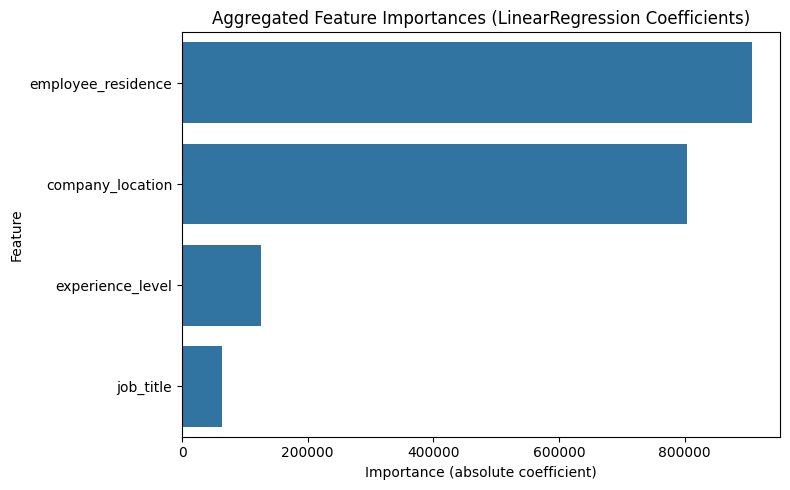

In [1553]:
# ========================
# 7. Aggregate feature importances by original feature (LinearRegression)
# ========================

# Get coefficients from LinearRegression
linear_regression_coefs = models_2["LinearRegression"].coef_

# Use same OHE feature names as before
ohe_2 = preprocessor_2.named_transformers_["cat"]
ohe_features_2 = ohe_2.get_feature_names_out(features_2)
all_features_2 = list(ohe_features_2)


# Map back to original columns
def map_to_original(feature_name):
    for col in categorical_cols:
        if feature_name.startswith(col + "_"):
            return col
    if feature_name in numeric_cols:
        return feature_name
    return feature_name


original_features_2 = [map_to_original(f) for f in all_features_2]

# Aggregate absolute coefficients as importance
feature_importance_salaries_data_frame = (
    pd.DataFrame(
        {"feature": original_features_2, "importance": abs(linear_regression_coefs)}
    )
    .groupby("feature")
    .sum()
    .sort_values(by="importance", ascending=False)
    .reset_index()
)

print("\n=== Aggregated Feature Importances (LinearRegression coefficients) ===")
print(feature_importance_salaries_data_frame)

# ========================
# 8. Visualize aggregated feature importances
# ========================
plt.figure(figsize=(8, 5))
sns.barplot(x="importance", y="feature", data=feature_importance_salaries_data_frame)
plt.title("Aggregated Feature Importances (LinearRegression Coefficients)")
plt.xlabel("Importance (absolute coefficient)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [1554]:
# 1. Create new samples with STRING values and updated realistic salary fields
new_samples = pd.DataFrame(
    [
        {
            "work_year": 2023,
            "experience_level": "SE",
            "employment_type": "FT",
            "job_title": "Data Scientist",
            "employee_residence": "US",
            "company_location": "US",
            "company_size": "M",
            "remote_ratio": 100,
            "salary": 120000,
            "salary_currency": "USD",
            "salary_in_usd": 120000,
        },
        {
            "work_year": 2023,
            "experience_level": "MI",
            "employment_type": "FT",
            "job_title": "Data Engineer",  # 🔄 changed here
            "employee_residence": "IN",
            "company_location": "US",
            "company_size": "L",
            "remote_ratio": 50,
            "salary": 70000,  # 🔄 updated for Data Engineer
            "salary_currency": "USD",
            "salary_in_usd": 70000,
        },
        {
            "work_year": 2023,
            "experience_level": "EN",
            "employment_type": "FT",
            "job_title": "Data Analyst",
            "employee_residence": "GB",
            "company_location": "GB",
            "company_size": "S",
            "remote_ratio": 0,
            "salary": 45000,  # 🔄 updated for Data Analyst (in USD directly)
            "salary_currency": "USD",
            "salary_in_usd": 45000,
        },
    ]
)

# 2. Drop target columns (keep only features the model expects)
X_new = new_samples.drop(columns=["salary", "salary_currency", "salary_in_usd"])

# 3. Apply the SAME preprocessing pipeline you used for training
X_new_processed = preprocessor_2.transform(X_new)

# 4. Predict using the trained model
predictions = models_2["LinearRegression"].predict(X_new_processed)

# 5. Attach predictions back
new_samples["predicted_salary_usd"] = predictions.round(2)
import numpy as np

# 6. Compute error percentage
new_samples["error_percentage"] = (
    (new_samples["predicted_salary_usd"] - new_samples["salary_in_usd"])
    / new_samples["salary_in_usd"]
    * 100
).round(2)

# 7. Add comment about acceptability (e.g., <20% is okay in salary prediction)
new_samples["comment"] = np.where(
    new_samples["error_percentage"].abs() <= 20, "✅ Acceptable", "⚠️ High Error"
)

# 8. Print results clearly
print(new_samples.to_string(index=False, line_width=10000))

 work_year experience_level employment_type      job_title employee_residence company_location company_size  remote_ratio  salary salary_currency  salary_in_usd  predicted_salary_usd  error_percentage       comment
      2023               SE              FT Data Scientist                 US               US            M           100  120000             USD         120000             161299.83             34.42 ⚠️ High Error
      2023               MI              FT  Data Engineer                 IN               US            L            50   70000             USD          70000              16333.64            -76.67 ⚠️ High Error
      2023               EN              FT   Data Analyst                 GB               GB            S             0   45000             USD          45000              15731.29            -65.04 ⚠️ High Error


Suggested optimal k from elbow method: 2


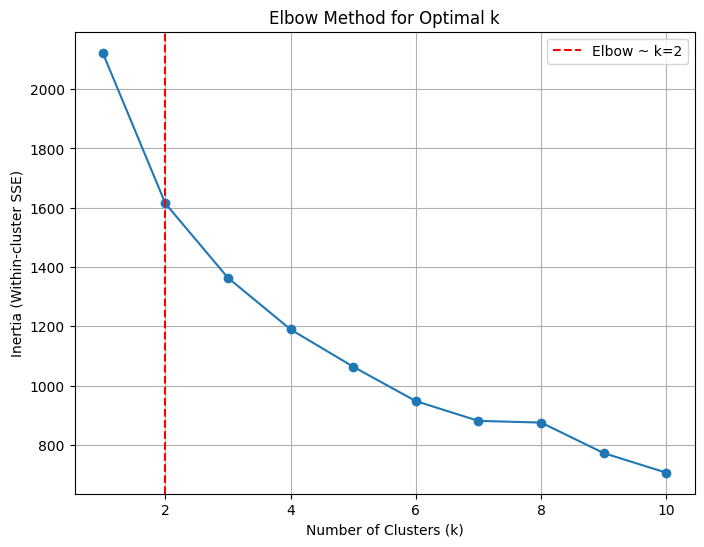

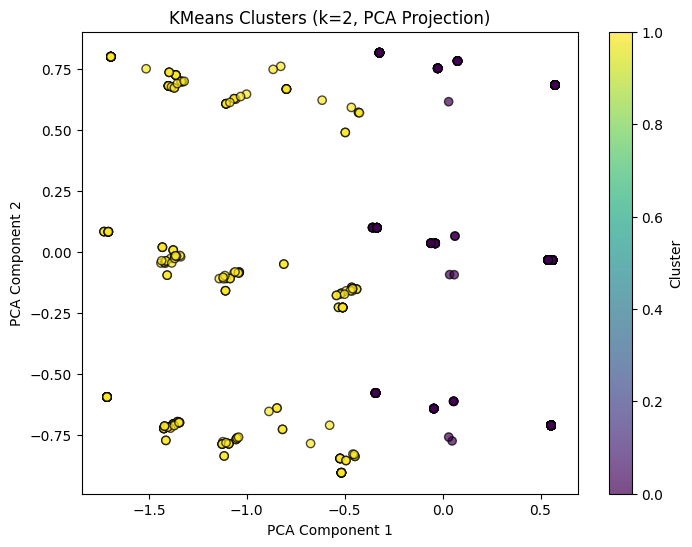


=== Cluster Profiles ===

 cluster  salary_in_usd_mean  salary_in_usd_median  salary_in_usd_min  salary_in_usd_max most_common_job most_common_experience most_common_employee_residence most_common_company_location most_common_company_size
       0       146880.880052              141525.0            24000.0           300000.0   Data Engineer                     SE                             US                           US                        M
       1        69149.785992               61566.0             5679.0           258000.0  Data Scientist                     MI                             GB                           GB                        M


In [1555]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# ---- Select relevant features ----
features_for_clustering = [
    "employee_residence",
    "company_location",
    "experience_level",
    "job_title",
    "salary_in_usd",
]
X_unsup = salaries_data_frame[features_for_clustering]

# ---- Apply preprocessing pipeline ----
X_unsup_processed = preprocessor_2.transform(X_unsup)

# ---- Elbow method to find optimal k ----
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans_temp.fit(X_unsup_processed)
    inertia.append(kmeans_temp.inertia_)

# Optional: automatic "elbow" detection using second derivative
diff = np.diff(inertia)
diff2 = np.diff(diff)
elbow_k = np.argmax(diff2) + 2  # +2 due to double diff shift
print(f"Suggested optimal k from elbow method: {elbow_k}")

plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, marker="o", linestyle="-")
plt.axvline(x=elbow_k, color="r", linestyle="--", label=f"Elbow ~ k={elbow_k}")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-cluster SSE)")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.legend()
plt.show()

# ---- Fit final KMeans ----
optimal_k = elbow_k  # use elbow method result
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init="auto")
clusters = kmeans.fit_predict(X_unsup_processed)
salaries_data_frame["cluster"] = clusters

# ---- PCA for 2D visualization ----
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_unsup_processed)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="viridis", alpha=0.7, edgecolor="k"
)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title(f"KMeans Clusters (k={optimal_k}, PCA Projection)")
plt.colorbar(scatter, label="Cluster")
plt.show()

# ---- Cluster profiling ----
cluster_profiles = (
    salaries_data_frame.groupby("cluster")
    .agg(
        salary_in_usd_mean=("salary_in_usd", "mean"),
        salary_in_usd_median=("salary_in_usd", "median"),
        salary_in_usd_min=("salary_in_usd", "min"),
        salary_in_usd_max=("salary_in_usd", "max"),
        most_common_job=("job_title", lambda x: x.value_counts().index[0]),
        most_common_experience=(
            "experience_level",
            lambda x: x.value_counts().index[0],
        ),
        most_common_employee_residence=(
            "employee_residence",
            lambda x: x.value_counts().index[0],
        ),
        most_common_company_location=(
            "company_location",
            lambda x: x.value_counts().index[0],
        ),
        most_common_company_size=("company_size", lambda x: x.value_counts().index[0]),
    )
    .reset_index()
)

print("\n=== Cluster Profiles ===\n")
print(cluster_profiles.to_string(index=False))